# Lab 5.2 - Structuring Code
When solving a problem, a good programmer will consider how easy the code will be to maintain and reuse. In this lab we'll practice modular programming, and see how it enables us to reuse code efficiently.

## Programming Exercises

### Cinema Booking Tool
Modular programming is the practice of separating functionality into reusable and interchangable modules (note that the word "module" doesn't refer to a Python module, but a logically separate block of functionality).

In this first task, we have a program to handle bookings at a cinema. As they offer a concession discount, the user is asked for each guest's age and concession status, then calculates the total and prints it to the screen.

While the program is fully functional, it's poorly designed. None of the code is reusable, and all of the logic is mixed together. Take a moment to read through the code and run it a few times so you understand how it works.

In [1]:
CONCESSION_PRICE = 10
FULL_PRICE = 15

tickets = []

adding_people = True
while adding_people:
    age = int(input('Age: '))

    if age <= 16 or age >= 65:
        has_concession = True
    else:
        has_concession = input('Concession? (y/n): ') == 'y'

    if has_concession:
        price = CONCESSION_PRICE
    else:
        price = FULL_PRICE
    tickets.append(price)

    adding_people = input('Add another? (y/n): ') == 'y'

total_price = 0
for ticket in tickets:
    total_price = total_price + ticket

print(f'Total price: ${total_price:.2f}')

Age: 25
Concession? (y/n): n
Add another? (y/n): n
Total price: $15.00


In the next cell we have a more modular design for the same program. The booking is now contained in a class which provides very nice methods to perform the same tasks. Take a look at the bottom of the cell and see how simple it is to interact with this class.

The class is incomplete, so it's your task to fill in the missing methods (by copy-pasting and modifying code from the previous cell) to provide the same functionality as the previous implementation.

When you think you're done, run the program and check that it functions the same as the previous version.

_Hint: Implement the `has_concession` method first, so it can be used in the `add_ticket` method._

In [ ]:
CONCESSION_PRICE = 10
FULL_PRICE = 15

class Booking:
    def __init__(self):
        self.tickets = []
    
    def user_input_ticket(self):
        """Asks the user for guest age and adds a ticket to the booking"""
        age = int(input('Age: '))
        self.add_ticket(age)

    def add_ticket(self, age):
        """Adds a ticket to the booking, accounting for concession discounts"""
        # Write your solution here
    
    def has_concession(self, age):
        """Returns True if the guest has a concession"""
        # Write your solution here
    
    def get_total_price(self):
        """Calculates and returns the sum of ticket prices for the booking"""
        total_price = 0
        for ticket in self.tickets:
            total_price = total_price + ticket
        return total_price


booking = Booking()

adding_people = True
while adding_people:
    booking.user_input_ticket()
    adding_people = input('Add another? (y/n): ') == 'y'

print(f'Total price: ${booking.get_total_price():.2f}')

###### Solution

Although this solution has more code than the original version, it's much cleaner and easier to maintain. For example, if the rules relating to concessions change, it's very clear which section of the code would need to be updated - the  `has_concession` method.

In [2]:
CONCESSION_PRICE = 10
FULL_PRICE = 15

class Booking:
    def __init__(self):
        self.tickets = []
    
    def user_input_ticket(self):
        """Asks the user for guest age and adds a ticket to the booking"""
        age = int(input('Age: '))
        self.add_ticket(age)

    def add_ticket(self, age):
        """Adds a ticket to the booking, accounting for concession discounts"""
        if self.has_concession(age):
            self.tickets.append(CONCESSION_PRICE)
        else:
            self.tickets.append(FULL_PRICE)
    
    def has_concession(self, age):
        """Returns True if the guest has a concession"""
        if age <= 16 or age >= 65:
            has_concession = True
        else:
            has_concession = input('Concession? (y/n): ') == 'y'
        return has_concession
    
    def get_total_price(self):
        """Returns the sum of ticket prices for the booking"""
        total_price = 0
        for ticket in self.tickets:
            total_price = total_price + ticket
        return total_price


booking = Booking()

adding_people = True
while adding_people:
    booking.user_input_ticket()
    adding_people = input('Add another? (y/n): ') == 'y'

print(f'Total price: ${booking.get_total_price():.2f}')

Age: 25
Concession? (y/n): n
Add another? (y/n): n
Total price: $15.00


### Shipping Order Tool
For this exercise you are to finish the implementation of a shipping order tool, which calculates the price to send a package containing multiple items. The program first asks the user for the weight of each item in the package, then calculates and prints the total weight of the package along with the price to ship it.

The cost to send a package is normally $10, but the shipping company is currently offering a promotional deal:
 - packages under 500g are sent for free
 - packages under 2kg are half-price
 - all other packages are full-price

Some of the program has already been implemented, but it is your task to finish the program off.

_Hint: It may help to look at the way the class is used at the bottom of the code cell._

In [ ]:
FREE_LIMIT_KG = 0.5
HALF_PRICE_LIMIT_KG = 2
SHIPPING_PRICE = 10


def price_from_weight(weight):
    """Returns the price to send a package of the given weight"""
    if weight <= FREE_LIMIT_KG:
        return 0
    if weight <= HALF_PRICE_LIMIT_KG:
        return SHIPPING_PRICE / 2
    return SHIPPING_PRICE


class Package:
    def __init__(self):
        self.item_weights = []
    
    def add_item(self, weight):
        """Adds an item weight to the package"""
        # Write your solution here
    
    def get_total_price(self):
        """Returns the total price for the package"""
        # Write your solution here
    
    def get_total_weight(self):
        """Returns the sum of the item weights for the package"""
        # Write your solution here



package = Package()

adding_items = True
while adding_items:
    weight = float(input('Item weight (kg): '))
    package.add_item(weight)
    adding_items = input('Add another? (y/n): ') == 'y'

print(f'Total weight: {package.get_total_weight():.2f}kg')
print(f'Total price : ${package.get_total_price():.2f}')

###### Solution

Note how the program structure facilitated code reuse - the method `get_total_weight` is able to be reused:
 - at the bottom of the cell to print the weight to the screen
 - in `get_total_price` to compute the package price



In [3]:
FREE_LIMIT_KG = 0.5
HALF_PRICE_LIMIT_KG = 2
SHIPPING_PRICE = 10


def price_from_weight(weight):
    """Returns the price to send a package of the given weight"""
    if weight <= FREE_LIMIT_KG:
        return 0
    if weight <= HALF_PRICE_LIMIT_KG:
        return SHIPPING_PRICE / 2
    return SHIPPING_PRICE


class Package:
    def __init__(self):
        self.item_weights = []
    
    def add_item(self, weight):
        """Adds an item weight to the package"""
        self.item_weights.append(weight)
    
    def get_total_price(self):
        """Returns the total price for the package"""
        total_weight = self.get_total_weight()
        total_price = price_from_weight(total_weight)
        return total_price
    
    def get_total_weight(self):
        """Returns the sum of the item weights for the package"""
        total_weight = 0
        for weight in self.item_weights:
            total_weight = total_weight + weight
        return total_weight


package = Package()

adding_items = True
while adding_items:
    weight = float(input('Item weight (kg): '))
    package.add_item(weight)
    adding_items = input('Add another? (y/n): ') == 'y'

print(f'Total weight: {package.get_total_weight():.2f}kg')
print(f'Total price : ${package.get_total_price():.2f}')

Item weight (kg): 10
Add another? (y/n): n
Total weight: 10.00kg
Total price : $10.00


### Creating Modules
It is often convenient to package related code into a module to make it available where necessary. In Python, this is done by placing code into a file ending in `.py` - a Python script file. In this exercise, we will place the code from the previous exercise into a `shipping` module.

By convention, Python files are named similarly to variables, so you will see files with names like `text_processing.py`, `some_module_name.py` or in our case - `shipping.py`. Normally you would create this with a regular text editor, such as Visual Studio Code, but we'll need to do it a little differently as we're using notebook.

Run the next cell to create a file with the name `shipping.py`.

In [4]:
# Create shipping.py if it doesn't exist
!touch -a shipping.py

To access this file, click the "Files" button (the one with the folder icon) on the left to open the files sidebar. It should look like this:

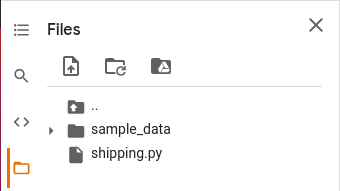

Double click `shipping.py` to open the file in the editor. To save changes, you just need to hit `<ctrl>+s`.

There's one more thing to do before moving on. Run the following cell so we can edit the file and use it immediately in the notebook. As we're running Python in a notebook, these commands are required so modules are reloaded automatically.

In [5]:
%load_ext autoreload
%autoreload 2

Great! The file is still empty, so we need to move our shipping-related code into it.

Copy the code from the solution to the Shipping Order Tool exercise into this file and save it. It should contain the entirety of the program's code:

```python
FREE_LIMIT_KG = 0.5
HALF_PRICE_LIMIT_KG = 2

...

print(f'Total weight: {package.get_total_weight():.2f}kg')
print(f'Total price : ${package.get_total_price():.2f}')
```

Up until now, we've been running Python directly in the notebook. However, the other way is to run a script directly. We would normally do this in a console, by running something like the below, we would run `my_script` as the _main module_.

```
python my_script.py
```

However, as we're running our code in a notebook, we need to add an exclamation mark to indicate that it's a _shell_ command.

_(This is the same reason that we used the exclamation mark in the last lab when we ran `!pip install pandas`)_

Run the next cell to run our shipping program.

In [6]:
!python shipping.py

It should work exactly as it did before. If so, mission success! If not, make sure that you've entered the entirety of the source code into the file and saved it.

### Importing Modules
Now let's say that we want to reuse the `price_from_weight` function to give a price estimate for a given package weight. The below code cell would do just that.

Run the cell to see if it works.

In [7]:
import shipping

weight = float(input('Package weight (kg): '))
print(f'Quoted price: ${price_from_weight(weight):.2f}')

Package weight (kg): 40
Quoted price: $10.00


Uh oh! Although we only wanted to use the `price_from_weight` function, when we imported the shipping module we caused the program to run. This is because when a module is imported, all code inside that module is executed. This is a problem, as we don't want `shipping` to act as as the _main module_ in this instance.

Python provides a simple solution. We're able to tell when a script is run as the _main module_ rather than as an imported module by checking a special variable called `__name__`. If this variable is set to `'__main__'`, the script was run like `python my_script.py`

This means that to run code _only_ when the script is run as the main module, we just need to put that script inside a _main module guard_ like this:

```python
print('I am always executed')

if __name__ == '__main__':
    print('I am not executed when imported')
```

Fix the import problem in our `shipping.py` script by placing the appropriate code inside a _main module guard_ like the above. Then, run the following cell to ensure that it works as expected.

In [21]:
import shipping

weight = float(input('Package weight (kg): '))
print(f'Quoted price: ${price_from_weight(weight):.2f}')

Package weight (kg): 7
Quoted price: $10.00


###### Solution

The code in `shipping.py` should end like this:
```python
...

if __name__ == '__main__':
    package = Package()

    adding_items = True
    while adding_items:
        weight = float(input('Item weight (kg): '))
        package.add_item(weight)
        adding_items = input('Add another? (y/n): ') == 'y'

    print(f'Total weight: {package.get_total_weight():.2f}kg')
    print(f'Total price : ${package.get_total_price():.2f}')
```

### Creating Modules 2
Finally, we'll create another file which is responsible for giving shipping quotes. Run the following cell to create a file called `shipping_quote.py`, then open the file using the files sidebar. You may need to click the "refresh" button above the file browser to see the newly-created file.

In [27]:
# Create shipping_quote.py if it doesn't exist
!touch -a shipping_quote.py

Now, move the appropriate code into this file and add the _main module guard_ so we don't have trouble with imports.

The program should function exactly as before, but with the ability to be run by calling `python shipping_quote.py`. Once you've completed `shipping_quote.py`, run the following cell to ensure that it works as expected.

_Note that by running `shipping_quote.py`, `shipping_quote` becomes the main module._

In [28]:
!python shipping_quote.py

###### Solution

Although we don't intend on importing `shipping_quote` anywhere else, it's a good habit to use a _main module guard_ with every program. This prevents unforeseen issues in the future.

In [29]:
import shipping

if __name__ == '__main__':
  weight = float(input('Package weight (kg): '))
  #print(f'Quoted price: ${shipping.price_from_weight(weight):.2f}') 
  #Unable to print this function
  print(f'Quoted price: ${price_from_weight(weight):.2f}')

Package weight (kg): 2


AttributeError: ignored

## Bonus Tasks
If you're concerned that you might forget some of the content you've learned today and desire some more practice, these bonus tasks are for you!

### Cinema Module
You are to move the Cinema Booking Tool code into a file called `cinema.py` and modify it such that it's compatible with the code below.

Since the code for entering tickets is in the code cell below, we don't need this in the module itself. Thus the module should contain _only_ the class definition.

In [14]:
# Create cinema.py if it doesn't exist
!touch -a cinema.py

In [15]:
import cinema

booking = cinema.Booking()

adding_people = True
while adding_people:
    booking.user_input_ticket()
    adding_people = input('Add another? (y/n): ') == 'y'

print(f'Total price: ${booking.get_total_price():.2f}')

AttributeError: ignored

### Cinema Module 2
This is a very small task, but will help test and reinforce your module knowledge.

Add the missing function to the cinema module, such that it produces this output:

```
TICKET PRICES:
Full price: $15
Concession: $10
```

In [ ]:
import cinema

cinema.print_ticket_prices()